# Test for getting a LM for entire sub
Since not every sub has enough text per month

In [7]:
import os

os.chdir('/homes/gws/taugust/ARK/community_guidelines')

%run Reddit/SRILM_building_funcs.ipynb

/homes/gws/taugust/ARK/community_guidelines


In [5]:
# ##################################################################
# # redefining alt functions that don't rely on month
# ##################################################################



# # if no month, assume you want the entire df and set threshold for total counts
# def get_active_users(author_df, month, author_col, threshold=5, num_authors=200, kind=None):
#     if kind:
#         author_df = author_df[author_df['kind'] == kind]
        
#     if month is not None:
#         author_df = author_df[author_df[str(month)] > threshold].drop_duplicates()
#     else:
#         print('No month...taking all author counts')
#         author_df = author_df[author_df[[str(m) for m in MONTHS]].sum(axis=1) >= threshold]
        
        
#     if num_authors: 
#         return author_df.sample(num_authors)[author_col]
    
#     return author_df[author_col]
    
# ##################################################################
# # getting outsiders -- users who only ever posted once in a community
# ##################################################################
# def get_outside_users(author_df, month, author_col, threshold=1, num_authors=None, kind=None):
#     if kind:
#         author_df = author_df[author_df['kind'] == kind]

#     outside_users = author_df[author_df[[str(m) for m in MONTHS]].sum(axis=1) <= threshold]
    
#     if month is not None:
#         outside_users = outside_users[outside_users[month] == threshold]
#     else:
#         print('No month...taking all author counts')
        
#     if num_authors:
#         return outside_users[author_col].sample(num_authors)
#     return outside_users[author_col]
    
    
# def get_user_comments(df, authors, month, num_posts, month_col='created_month'):
#     if month is not None:
#         df = df[df[month_col] == month]
#     else:
#         print('No month...taking all author counts')

#     df_author = df[df['author'].apply(lambda x: x in authors)]
#     df_grouped = df_author.groupby('author')
    
#     sampled_comments = []
#     for a, g in df_grouped:
#         if num_posts:
#             sample = g.sample(num_posts)['body'].apply(lambda x: [w for w in word_tokenize(x)][:10]) 
#         else: 
#             sample = g['body'].apply(lambda x: [w for w in word_tokenize(x)][:10]) 
#         sampled_comments.extend(sample)
#     return sampled_comments


# def construct_LM_SRILM(active_user_text, sub_name, month, index_num, kind, vocab=None, ngram_count_command='./../../tools/SRILM/bin/i686-m64/ngram-count'):
#     if month is not None:
#         month_str = str(month) 
#     else:
#         month_str = 'total'
        
#     corpus_path = export_text(active_user_text, name=sub_name+'_'+str(index_num)+'_month_'+month_str)
    
#     count_file = '../srilms_LMs/counts/' + kind + '_' + sub_name +'_'+str(index_num)+'_month_'+month_str+'.count'
#     lm_path = '../srilms_LMs/' + kind + '/' + sub_name + '/' +sub_name+'_'+str(index_num)+'_month_'+month_str+'.lm'
    
#     train_SRILM(ngram_count_command, corpus_path, count_file, lm_path)
#     return lm_path


# # build an SLMs for a single month
# def build_SLMs_SRILM(df, author_counts, slm_count, month, name, num_authors, kind, threshold_count):
#     print('Creating ', colored(str(slm_count) + ' SLMs ', 'red'), 'for', colored(' month ' + str(month), 'green'), '.....')
#     slms = []
#     for i in range(0, slm_count): 
#         active_users = get_active_users(author_counts, month, 'author', threshold=threshold_count, num_authors=num_authors, kind=kind)
#         active_user_comments = get_user_comments(df, list(active_users), month=month, num_posts=threshold_count)
#         slm_path = construct_LM_SRILM(active_user_comments, name, month, i, kind=kind)
#         slms.append(slm_path)
#     return slms


# # returns dict of {month:SLM}
# def build_total_SLM_SRILM(df, author_counts, slm_count, name, use_saved_lms=False, kind=None, num_authors=200, threshold_count=5):
#     slms = []
#     # if we don't want to remake the LMs, can just load our old ones
#     if use_saved_lms:
#         for i in range(0, slm_count):
#             slms.append('../srilms_LMs/'+ kind + '/' + name + '/' + name +'_'+str(i)+'_month_total.lm')
#         return slms
#     # otherwise just remake them
#     else: 
#         slms = build_SLMs_SRILM(df, 
#                                 author_counts,
#                                 slm_count,
#                                 month=None,
#                                 name=name,
#                                 num_authors=num_authors, # num authors to sample
#                                 kind=kind, # kind of text, either posts or comments
#                                 threshold_count=threshold_count) # threshold of how many posts to use
#         return slms
    
    
    
# # returns difference of the means of the cross entropy of outside vs. inside text divided by inside posts
# def calc_acc_gap_SRILM(slms, author_counts, comments, sub_name, kind=None, num_active_authors=5, num_active_posts=10, num_outside_authors=50, num_outside_posts=1):
#     print('Calculating cross entropy for', colored('Total', 'green'), '.....')
#     active_authors = get_active_users(author_counts, None, 'author', threshold=10, num_authors=num_active_authors, kind=kind)
#     outside_authors = get_outside_users(author_counts, None, 'author', threshold=1, num_authors=num_outside_authors, kind=kind)
#     print('sampled active users:', len(active_authors), 'sampled outside users:', len(outside_authors))

#     active_comments = get_user_comments(comments, list(active_authors), month=None, num_posts=num_active_posts)
#     outside_comments = get_user_comments(comments, list(outside_authors), month=None, num_posts=num_outside_posts)
    
#     print('sampled active comments:', len(active_comments), 'sampled outside comments:', len(outside_comments))

    
#     # export to SRILM test directory
#     active_corpus_file = export_text(active_comments, name=sub_name+'_inside_month_total', corpus_path='../data/srilm_data/test')
#     outside_corpus_file = export_text(outside_comments, name=sub_name+'_outside_month_total', corpus_path='../data/srilm_data/test')

#     # run through SRILM LMs for the month and get the entropy
#     active_ent = calc_month_entropy_SRILM(slms, active_corpus_file)
#     outside_ent = calc_month_entropy_SRILM(slms, outside_corpus_file)

#     print(active_ent, outside_ent)

#     # calculate the acc gap
#     exp_val_active_ent = np.mean(active_ent)
#     exp_val_outside_ent = np.mean(outside_ent)

#     acc_gap = (exp_val_outside_ent - exp_val_active_ent) / exp_val_active_ent

#     # also save variance of the acc gap by subtracting: https://www.kean.edu/~fosborne/bstat/05b2means.html
#     var_active_ent = np.var(active_ent)
#     var_outside_ent = np.var(outside_ent)

#     acc_gap_var = (var_active_ent/len(active_ent)) + (var_outside_ent/len(outside_ent))
    
#     return acc_gap, acc_gap_var

# Building SLMs on total posts 
Since many subs don't have enough in just one month

In [17]:
subs = ['Cooking', 'mentalhealth', 'Seahawks', 'science', 'politics','news', 'RoastMe']
slms = {}
for i, s in enumerate(subs):
    print('-----------------------------------------------')
    print('Building totla SLMs for ', colored(s, 'magenta'))
    print('-----------------------------------------------')
    df_posts, df_author_counts_train = import_csvs(s, path='data/cleaned/train/2018/', ext='_train_2018.csv', comment_pre_path='data/cleaned/sub_posts/', comment_ext='_posts_2018.csv')
    
    # rename post fulltext as body
    df_posts = df_posts.rename(index=str, columns={'fulltext': 'body'})
    
    slms[s] = build_total_SLM_SRILM(df_posts, df_author_counts_train, slm_count=1, name=s, use_saved_lms=False, kind='post', num_authors=100, threshold_count=3)


-----------------------------------------------
Building totla SLMs for  Cooking
-----------------------------------------------
Importing  data/cleaned/sub_posts/Cooking_posts_2018.csv ..... Done
Importing  data/cleaned/train/2018/author_counts/Cooking_author_counts_train_2018.csv ..... Done
Creating  1 SLMs  for  month None .....
No month...taking all author counts
No month...taking all author counts
Reading text corpus at ../data/srilm_data/Cooking_0_month_total.txt  and writing to count file  ../srilms_LMs/counts/2018/post_Cooking_0_month_total.count .....

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


../srilms_LMs/counts/2018/post_Cooking_0_month_total.count: No such file or directory
Done
Training LM from count file ../srilms_LMs/counts/2018/post_Cooking_0_month_total.count  to  ../srilms_LMs/2018/post/Cooking/Cooking_0_month_total.lm ....../srilms_LMs/counts/2018/post_Cooking_0_month_total.count: No such file or directory
Done
-----------------------------------------------
Building totla SLMs for  mentalhealth
-----------------------------------------------
Importing  data/cleaned/sub_posts/mentalhealth_posts_2018.csv ..... Done
Importing  data/cleaned/train/2018/author_counts/mentalhealth_author_counts_train_2018.csv ..... Done
Creating  1 SLMs  for  month None .....
No month...taking all author counts
No month...taking all author counts
Reading text corpus at ../data/srilm_data/mentalhealth_0_month_total.txt  and writing to count file  ../srilms_LMs/counts/2018/post_mentalhealth_0_month_total.count ......./srilms_LMs/counts/2018/post_mentalhealth_0_month_total.count: No such f

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
data/cleaned/train/2018/author_counts/Seahawks_author_counts_train_2018.csv

In [18]:
seahwawks = pd.read_csv('data/cleaned/train/2018/author_counts/Seahawks_author_counts_train_2018.csv')

In [19]:
seahwawks[seahwawks['kind'] == 'post']

,author,1,2,3,4,5,6,7,8,9,10,11,12,kind
23,BroseidonTheGod,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,post
80,MikeSL625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,post
88,ou812_X,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,post
93,ThePrince_OfWhales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,post
98,takmsdsm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,post
100,Neighbor2972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,post
117,dsullivan1285,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,post
134,chemja,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,post
139,riedmae,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,post
144,RyGuyTheGingerGuy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,post


In [ ]:
slms

In [15]:
range(10)

range(0, 10)

In [19]:
num_samples = 15
rows = []
for s in subs:
    gap_post_post, gap_post_comment = sample_acc_gap_post_comment(slms, s, num_samples)
    print(len(gap_post_comment))
    for i in range(num_samples):
        rows.append({'sub': s, 'kind':'post_post', 'gap':gap_post_post[i]})
        rows.append({'sub': s, 'kind':'post_comment', 'gap':gap_post_comment[i]})

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


[7.624719435980657, 7.664100925052309, 7.626274122665847, 7.721150468425237, 7.68035882018872, 7.702645770197859, 7.6774504543775235, 7.600701646834371, 7.581700729949813, 7.6209807518436445, 7.7775512222878, 7.707174814290038, 7.730018322027742, 7.712262166793684, 7.60593133124735, 7.736500024480896, 7.720764116353659, 7.613505132544746, 7.655923497744962, 7.6662573841607, 7.721356252692389, 7.743131192873646, 7.601859909672928, 7.724620260744861, 7.667218719865606, 7.650770302318213, 7.7268441565542325, 7.621310508534127, 7.602148773263755, 7.72338995506673, 7.710914545696839, 7.714287423913437, 7.60184208586031, 7.646504709329539, 7.647687944215983, 7.6718679579932365, 7.712238776550885, 7.684780874725409, 7.715706708429209, 7.675268325618609, 7.701684199312785, 7.659831105489212, 7.702288373438538, 7.656093023134615, 7.738485484018942, 7.648512899320502, 7.632263125336659, 7.741160212552022, 7.631511038240036, 7.651393303884824] [7.657094747509174, 7.723553100844657, 7.595602120363

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.684093561804996, 7.662152081342368, 7.679071864618901, 7.782568447778313, 7.7207730070333636, 7.699445441951519, 7.692701276299991, 7.603316262036707, 7.709306490942971, 7.617418242013876, 7.79097985332997, 7.659806136128857, 7.771807025539611, 7.707651092968275, 7.723269119732399, 7.725498505980728, 7.672499596422951, 7.698612998036002, 7.694153091833326, 7.655406930495857, 7.672350376457995, 7.820331522540922, 7.610192147862041, 7.6831539382743195, 7.70161281799744, 7.720893367766855, 7.806327924508794, 7.573515407754673, 7.7002767

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.672623345349737, 7.680775831736941, 7.689799543540987, 7.73152540651876, 7.720114264496285, 7.739654389527922, 7.67547158492629, 7.616779656521004, 7.714055893856625, 7.632471807288459, 7.765669992683488, 7.785453122071162, 7.787744572370313, 7.737296023655952, 7.705540466617352, 7.768327263626325, 7.672002372310438, 7.731586498863453, 7.684915493598884, 7.723998756563736, 7.6984067220849655, 7.750692249392445, 7.65205548634754, 7.730635201264283, 7.799974466887197, 7.748224387229363, 7.788361407055387, 7.602156198300532, 7.658035063

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.702561277405291, 7.634609240222735, 7.665939874880076, 7.725402388730706, 7.67194153369716, 7.699549550430144, 7.645931455971339, 7.579165814050244, 7.604667380008667, 7.632491437835101, 7.7787211047589055, 7.681865259243212, 7.725917665932376, 7.6678126669816695, 7.740376463186093, 7.734620211002145, 7.642590391089976, 7.7403413801096335, 7.69430355658435, 7.730259534190962, 7.667800605972107, 7.703185160811789, 7.658537837734163, 7.653839641571465, 7.706532624580445, 7.7421652435947514, 7.748496119181067, 7.603124095853094, 7.67128

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.613489662101917, 7.659101822180732, 7.653490725718474, 7.7657661159385105, 7.7237319256486625, 7.643310026333795, 7.597351645548816, 7.630682124599817, 7.596813670697281, 7.58651481666839, 7.7093699100789905, 7.686597170507164, 7.722453728722324, 7.642157137623146, 7.680950195430383, 7.706193460698991, 7.630533612153242, 7.642503750804758, 7.5802661060564, 7.711556164824072, 7.669544148836194, 7.719038972042485, 7.5920451002413545, 7.672240750061971, 7.708512136964166, 7.643641212197405, 7.704289624346064, 7.623245027875583, 7.584731

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.670763163905781, 7.670554283264445, 7.66569974315828, 7.8192089665915185, 7.7484162822629665, 7.733928456956631, 7.618312815028533, 7.607802996373855, 7.756304120723862, 7.614805529898784, 7.7777570063290735, 7.676947179071008, 7.780884201575934, 7.640530554334344, 7.731397783051966, 7.766148556764539, 7.673368443052212, 7.712833046304137, 7.669396040236606, 7.7959337964943485, 7.713787904670688, 7.6424560964299575, 7.623519399434798, 7.773661450228918, 7.765702476430947, 7.726427990623514, 7.743070587459827, 7.690321406253133, 7.696

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.727648902913404, 7.79090624187014, 7.6461972261137205, 7.754020957034392, 7.791364786599807, 7.7745992993988615, 7.708315549594073, 7.721745179989432, 7.721745863424906, 7.621800607536012, 7.784484352511532, 7.702120726625316, 7.767503847577472, 7.679218983262181, 7.751072009710766, 7.768928642794411, 7.743607193534998, 7.760312110200805, 7.701845660520371, 7.8151014543817405, 7.747964684425274, 7.774271813484645, 7.668933900369552, 7.730601239004942, 7.778830814734025, 7.7256975369468615, 7.7885062760038135, 7.654186324458443, 7.677

Importing  data/cleaned/sub_posts/Naruto_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/Naruto_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.690725772426788, 7.705270890814502, 7.664071050317579, 7.7367496245878975, 7.759136521375874, 7.755615345197483, 7.647465621923464, 7.604133609733539, 7.688855239846449, 7.627013617949244, 7.810429607436777, 7.681723328850251, 7.83344547136467, 7.692770310693051, 7.672731528572305, 7.762479045685426, 7.654591637228378, 7.734141235440684, 7.690745324394957, 7.759854237056799, 7.698974777882707, 7.768281604144384, 7.578405149275215, 7.746795778767649, 7.7789089862128495, 7.670515336070974, 7.772117911863107, 7.58295485666615, 7.7076200

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.656251801002266, 7.733427558241035, 7.673441235569471, 7.8001071703165215, 7.690867518193012, 7.746041294911168, 7.779702942137177, 7.761480093193163, 7.806336303230559, 7.705983429239139, 7.737978731609556, 7.66318234974868, 7.751239420782251, 7.756222712847288, 7.875842712804123, 7.7438717200641625, 7.7869210624117615, 7.666916330277502, 7.790944025212485, 7.8042685063742665, 7.724449731915429, 7.738840104825973, 7.674366723044265, 7.74195701498966, 7.784756537149559, 7.7723040155659655, 7.6991636173103775, 7.7645777153343785, 7.736834

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.571330958522274, 7.715802787535838, 7.66073755730505, 7.698183049511721, 7.616857565861969, 7.697382545541317, 7.733728525008631, 7.677198133802287, 7.718118416304321, 7.6184919567436316, 7.690804676960943, 7.6570389952674445, 7.693360106271753, 7.6939754396347535, 7.826013891986688, 7.71144672423632, 7.7137934023848835, 7.616736290065126, 7.693158654754162, 7.687658420458938, 7.620740348356041, 7.673375510447881, 7.646228913595588, 7.715805532559153, 7.754095806447697, 7.756022510005758, 7.64249653054612, 7.683989033504643, 7.6558598311

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.525823801960067, 7.568880320626867, 7.503895685150543, 7.602200747718721, 7.504039543070091, 7.583239254748893, 7.65466681524005, 7.616817141729086, 7.624796186801174, 7.477950882712559, 7.634172856738947, 7.560753160934694, 7.6370559146369805, 7.5414768944961805, 7.722233070527597, 7.626653772725305, 7.629156960587092, 7.508498376881458, 7.651301449595604, 7.662216895304036, 7.5320449476447795, 7.552324807499705, 7.466721730589551, 7.56674590907451, 7.640072814967926, 7.6030231798078, 7.59137498406211, 7.603347421708743, 7.5444877045863

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.550119557611424, 7.670963519288986, 7.6163150531055, 7.741261353995934, 7.595184365639489, 7.706637604163423, 7.746968387904994, 7.638619814209068, 7.702293915149316, 7.635370598440704, 7.666073421973388, 7.725111271183669, 7.752956605971409, 7.641794548894158, 7.803658436957278, 7.6896136673222015, 7.701072145790781, 7.617893507090594, 7.771462398081082, 7.675662114522609, 7.62915331690897, 7.648467600165417, 7.541803653113796, 7.7001476815603285, 7.700058185834122, 7.697151067084367, 7.641585766234199, 7.69082841730366, 7.6660933109083

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.683947641010564, 7.777521634309234, 7.714768228164591, 7.791581632704707, 7.691604650909727, 7.810385903914645, 7.789941780272177, 7.732261736330599, 7.773887565217829, 7.7454733241804, 7.7220977896839065, 7.80178917990418, 7.808117931691575, 7.753555734326747, 7.905981411309624, 7.852277932640251, 7.808695232784259, 7.727173734718378, 7.767157528270704, 7.833082360680711, 7.743601135107425, 7.814199191619307, 7.678582534415588, 7.8289590143697225, 7.788087943584925, 7.775750510815191, 7.730566596676749, 7.794716071649147, 7.800917367422

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.628086051938733, 7.718641095543276, 7.641648620940424, 7.779238704996578, 7.712807602268556, 7.683771534244567, 7.769563490652572, 7.709016243888506, 7.7103277514059325, 7.63766023429035, 7.7351179873585965, 7.71126155112829, 7.743242969514366, 7.687787173412842, 7.883066626014895, 7.734173081749412, 7.801767843603291, 7.67280435323196, 7.769693732185077, 7.806004984383096, 7.692698486962152, 7.736665076542542, 7.665342313355908, 7.738083475033777, 7.760297471157271, 7.807376175890489, 7.696341643244161, 7.703463432428853, 7.793819169075

Importing  data/cleaned/sub_posts/pics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/pics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.60702176597189, 7.796055837029171, 7.604622906694463, 7.765703139356954, 7.64284234035218, 7.69229885858682, 7.730801604779257, 7.672082307518563, 7.73548900684342, 7.652492948310972, 7.694167721039476, 7.653877608842255, 7.737775980795626, 7.649024752828131, 7.879572835216088, 7.72242708757382, 7.7177867627430485, 7.601570988232811, 7.730860011258217, 7.77389415695992, 7.675568969863696, 7.705597831377728, 7.640161770953298, 7.764081374455423, 7.778738842865191, 7.820612982356968, 7.674804533116239, 7.707552398853468, 7.7863467436009115

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.605906892514635, 7.63846415216159, 7.569529826196506, 7.607855507106893, 7.6960292956245056, 7.587569768283964, 7.53112565190698, 7.71332670930505, 7.639544751903447, 7.635440980197256, 7.555217975088105, 7.60636671563913, 7.503316134216777, 7.680659811958856, 7.603385257548615, 7.5464901400276485, 7.657498529561819, 7.557589297716191, 7.599162296837015, 7.618938245908018, 7.551771312071484, 7.638910097160009, 7.551366818635219, 7.572994229713124, 7.5663227579187815, 7.565817249263758, 7.556544372756442, 7.611159836098466, 7.59

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.808307816520211, 7.852553229019504, 7.855863281595134, 7.821148306500463, 7.964285411782075, 7.75138538738254, 7.794772596827118, 7.988255222285338, 7.900181516011966, 7.80720871296417, 7.785424349635571, 7.8047337933055605, 7.735644698277398, 7.869408771611236, 7.752707787604271, 7.787286181531855, 7.834136015084176, 7.828333908818481, 7.796729470785252, 7.844846967456688, 7.807380040190101, 7.807853982451325, 7.8080078514153035, 7.776721213661757, 7.8084114380382035, 7.740430435484037, 7.877503167242735, 7.885411466315262, 7.

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.724307836566007, 7.7399702568664335, 7.682502368715834, 7.7318749555436606, 7.815118750782637, 7.744656264105157, 7.705429186301161, 7.786368962686672, 7.809240142357127, 7.760079864223138, 7.661453900240479, 7.66745292176314, 7.725321945258748, 7.75410583062783, 7.650938998657586, 7.709147930905098, 7.767030369151852, 7.653634027861564, 7.719651665274761, 7.75395412391943, 7.640959236906546, 7.801573862756766, 7.7351450723011865, 7.668014851246375, 7.646682544414031, 7.656689422496204, 7.729285605145513, 7.6978676261494, 7.741

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.549797757049628, 7.628734961480462, 7.593813877877458, 7.709047960185091, 7.743554013135587, 7.645231144090864, 7.61132437448103, 7.762577374866181, 7.741624056329284, 7.627228168532522, 7.540400080606266, 7.5970297788856005, 7.659743354113507, 7.763152599153529, 7.62454033485241, 7.666062056744585, 7.635043314449352, 7.602558578139481, 7.657531398878388, 7.6094225533200195, 7.574455778861412, 7.773461015479251, 7.668671577226513, 7.6287305877864595, 7.666772921509878, 7.582061421878287, 7.691592089302205, 7.694001217977264, 7.

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.677886625249075, 7.7591098831249, 7.681231382795805, 7.722432552464902, 7.864789721238744, 7.739920316633629, 7.701625292656739, 7.779657641271088, 7.729999295127018, 7.696808299537345, 7.590549625433758, 7.631174872557246, 7.675089744331724, 7.72358449917022, 7.621370589413267, 7.696948753694754, 7.749750119459176, 7.663960792965746, 7.599563280939999, 7.719344324323432, 7.606820471424381, 7.8379646803818215, 7.690177511155587, 7.721248920374778, 7.6379630235167575, 7.607169758752475, 7.718219130702328, 7.685904416920025, 7.70

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.553486457157007, 7.562707217743757, 7.523314951794969, 7.5860013179011965, 7.624039464699328, 7.582910461430546, 7.543578625676365, 7.719637292213068, 7.5880722122321975, 7.573519952083978, 7.521905041946917, 7.483801269643416, 7.573668392303968, 7.682954566767903, 7.563215342745563, 7.502003532974301, 7.622972799723628, 7.588429815720917, 7.498155908257911, 7.623579388397212, 7.551336054037532, 7.6953334007915375, 7.600439998846064, 7.533166957529137, 7.550182677530459, 7.549340338002904, 7.642074804753519, 7.5801145735066, 7.

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.692633633337047, 7.706913139229434, 7.617470403944375, 7.75936425834336, 7.77807844406327, 7.68642488876141, 7.659600657553482, 7.801957273057033, 7.744434266622009, 7.756488939586749, 7.672911108952621, 7.651302167229906, 7.659098253352119, 7.646679664668251, 7.674327878637457, 7.64832666036402, 7.6819741567610205, 7.717580468661358, 7.689864524689582, 7.64273983335407, 7.653247796070286, 7.744660300106855, 7.676447254316388, 7.667067532994181, 7.651432770728454, 7.662857043839727, 7.73682064111707, 7.769258666285812, 7.704316

Importing  data/cleaned/sub_posts/BabyBumps_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/BabyBumps_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.707513057359234, 7.687971885843825, 7.746462591448242, 7.693849328131617, 7.813252747463344, 7.665151126675861, 7.660121431752547, 7.770052001018036, 7.724277818453634, 7.688142583881666, 7.7201888413141395, 7.639355904356961, 7.681066191859474, 7.757091938284278, 7.699145567551137, 7.747343758273338, 7.763444109107299, 7.715169233712429, 7.738752302078942, 7.691309424213242, 7.578088087211657, 7.795985729898664, 7.725240815519558, 7.655210844083657, 7.686952874220091, 7.675633889503443, 7.685240770693208, 7.773191307679808, 7.

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.912632501680092, 7.821042405923619, 7.7588448057298525, 7.890407171244424, 7.668126927157787, 7.70273787555562, 7.9420300068787375, 7.756561659651938, 7.681036666380546, 7.792860556880666, 7.820408115684106, 7.713539111178218, 7.5946963346225935, 7.794863552234504, 7.645978275402784, 7.79234521848067, 7.944625394263391, 7.750051051437048, 7.695801079110779, 7.758801509568433, 7.968961061451859, 7.945583124347377, 7.747463265369976, 7.825852393805627, 7.82832819594527, 7.921121492437433, 7.671222594889839, 7.7745189173864375, 7.6565

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.9894421867628225, 7.926682045682512, 7.900141656418364, 7.998083775728638, 7.821484457430089, 7.903387811289745, 7.927148608347412, 7.883421650022045, 7.836737760150927, 7.856196422290373, 7.916518443771282, 7.876242501448529, 7.740847303453822, 7.9118425536863715, 7.818985372771495, 7.857195383060466, 7.969730712354924, 7.7856793580462815, 7.8035899897960315, 7.8845460289437295, 8.106605337390459, 8.056638256970391, 7.962434500410241, 7.9044961403807195, 7.9707725694723, 8.016412745639112, 7.898330507128444, 7.881815707776926, 7.7

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.93587458085045, 7.8898312515062905, 7.751524644500839, 7.674330703720492, 7.8063582165805006, 7.7385510109998465, 7.757215308506101, 7.816203525354111, 7.79175612782377, 7.706435235373909, 7.742875959526788, 7.758964696011492, 7.6792738849405024, 7.767408502180271, 7.794788189589931, 7.7736199150517376, 7.775343608543064, 7.786735528205452, 7.770839615188214, 7.723825424450379, 7.866051772860251, 7.882457810098393, 7.782707348002616, 7.814270342201768, 7.7371269866461825, 7.834701736332869, 7.720965169104276, 7.75347617691865, 7.82

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[8.030122505731672, 7.972546769024929, 7.878166201073161, 7.910018451821092, 7.817331619464286, 7.917850014254687, 7.953654034381006, 7.925642853230619, 7.891693190248045, 7.921994419763824, 7.903441440286798, 7.781924221445293, 7.819704582478381, 7.880284516864946, 7.905253410386927, 7.885963536942307, 8.026103436791695, 7.82333857694612, 7.798800966952635, 7.849429497535666, 8.001937320115559, 8.025235923335629, 7.973408080893928, 7.9083193582288835, 7.90929068533091, 7.987556217060468, 7.868123102474219, 7.88949970452684, 7.8499554

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.787196706502836, 7.788262209114575, 7.748035822141967, 7.7422454271782986, 7.687570945864593, 7.610751729438157, 7.790928390846012, 7.740692847007367, 7.728954469046697, 7.777052090500602, 7.684307505515951, 7.709203084199194, 7.647278528076872, 7.656157394646568, 7.688823775716358, 7.726637110278582, 7.842140367287219, 7.694708897408358, 7.599625761932432, 7.663624278107158, 7.847892332421324, 7.869379774904723, 7.737550894019444, 7.695037543812175, 7.791375206377309, 7.787646637844765, 7.666955374750201, 7.660025138361814, 7.7177

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.863673989895766, 7.895297773559568, 7.836770575710131, 7.892520352626627, 7.758940718752197, 7.80958872505861, 7.901686315709812, 7.7761026717449715, 7.677067022450128, 7.78122789763788, 7.814433142045729, 7.672449386688471, 7.678654360176042, 7.799716793174965, 7.78437638043755, 7.761888265140916, 7.8787437305757, 7.758113259182525, 7.742890102925623, 7.77935428577535, 7.959548773547506, 7.978571473266125, 7.799834629578292, 7.859558391103025, 7.921928983404672, 7.919437816237711, 7.699316337003473, 7.8160422055644, 7.695036847606

Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[8.029563314432659, 7.9727874139024095, 7.913816314134872, 7.960789694969923, 7.867142186950196, 7.951159384499493, 8.009465309131443, 7.886120884132608, 7.829460172405157, 7.9685567871039815, 7.944476643193983, 7.854544909104339, 7.867328785222074, 7.932211207984404, 7.898640685004982, 7.97114057766654, 8.029964099400694, 7.831580237318791, 7.880624309814382, 7.984793254471215, 8.015461886943749, 8.094122034993323, 8.006193655907236, 8.010334521407566, 7.993836236999316, 8.037871969856798, 7.9008287782796955, 7.926756160379044, 7.862

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (9,12,16,17,18,19,22,26,27,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.862871640887303, 7.943133675690711, 7.823565955213522, 7.874385094877554, 7.904897097544967, 7.905841254563769, 7.878755376881678, 7.8360440412804, 7.914209306999445, 7.8534112423244435, 7.952243278607771, 7.776548838208211, 7.900044418547233, 7.952829756942107, 7.800037907122621, 7.9574602034745, 7.882092764115696, 7.890372513094613, 7.823492077129749, 7.941012969502655, 7.938168150505842, 7.899752665604568, 7.976640874181871, 7.879491355282303, 7.898135780510368, 7.849231185112028, 7.908090538949901, 7.911446518588044, 7.925900941767386, 7.999637026371586, 7.813164868506619, 7.8399230662903

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[8.039330893973998, 8.03699392927259, 8.082297562091185, 8.06459565893272, 8.157290843502016, 8.13895419864845, 8.154135071734496, 8.063842112654477, 8.077801101986255, 7.981164241357494, 8.16944251961859, 7.976682111713411, 8.191040455671786, 8.108740322168313, 8.109883399812006, 8.137121794344418, 8.073707786080531, 8.118163987767927, 8.034270748736517, 8.157001758972173, 8.137979903325117, 8.046126498777323, 8.139734491421292, 8.101582847359323, 8.145131246908225, 8.065761316905094, 8.130590124639461, 8.225826325209047, 8.1115253

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[8.000590482426238, 8.072561931353762, 7.998294244936868, 7.940748762867904, 8.143051521830436, 8.079462916564355, 8.014793235320598, 7.95722975941349, 8.049202186183098, 7.997579201718181, 8.069494880313293, 7.960894504518625, 8.151919178000067, 8.050241017996216, 7.967640127554312, 8.066314190272458, 8.014190681545406, 8.080016962795328, 7.997922940758603, 8.057474100283594, 8.027442159125616, 8.037666098356807, 8.0667926019415, 8.011308334842916, 8.147182024839198, 7.954932595021245, 8.027653917483926, 8.138413118479116, 8.095599

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[8.03692581623817, 8.044895696569414, 8.044394665833744, 8.037162000905772, 8.094436664841144, 8.071728351693055, 8.092010762756425, 7.994996000238287, 8.037384418552932, 7.975168150933625, 8.128959920128798, 7.922774668338086, 8.149290871260677, 8.065471067795578, 8.041568809270965, 8.128859936119346, 8.072449386020853, 7.999925045537127, 8.034506818198368, 8.123627401571248, 8.16007360256792, 8.094879986411193, 8.039589713976197, 8.03360195070144, 8.178172333678045, 8.00756723010031, 8.062750443616151, 8.152606813880851, 8.0814083

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.941840503775814, 7.926231939478573, 7.896536455891822, 8.033600849543689, 8.021206531147937, 8.021671822258234, 7.854338570746693, 7.968220381358803, 7.911661026130538, 7.860245243553215, 7.999280727419448, 7.854680166273743, 7.985057489547869, 7.8961131823842745, 7.882570301464214, 7.948742166753616, 7.975846821873229, 7.885796412994173, 7.961028255922432, 7.972035480812234, 8.013986983774489, 7.872320279962286, 8.030559550769814, 7.948353213427107, 8.045948550619022, 7.893537561339736, 7.958327086383012, 7.903860159969242, 8.00

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.951875661707141, 8.006853964836305, 7.957672620557902, 7.958170459354273, 7.995480561636466, 8.101379566423654, 7.946205074149342, 7.980366391464847, 7.967158806581939, 7.968311979050529, 7.974017005140418, 7.889686475224263, 7.998641198179, 7.948247488768002, 7.916766229236089, 7.98666463612531, 8.022426629396566, 8.021023816161224, 7.9404586669716295, 8.070207906170888, 7.991060336603141, 7.91346929080484, 8.069013603457678, 7.964192980360834, 8.09133329649971, 7.859309900996166, 8.018265842898346, 8.010881638239052, 8.03132792

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[7.885953778411869, 7.896813121235561, 7.956852378565637, 7.9201902639020485, 8.013325465285428, 7.985842506113698, 7.965944703431517, 7.861486461675112, 7.902625943729929, 7.864181191186409, 8.006273896486906, 7.747283329568546, 7.993468878544398, 7.8917363212978495, 7.882250534014642, 7.917899529031195, 8.029740534740675, 7.907109387765068, 7.881836504139354, 8.03394822312276, 8.036245608109557, 7.937079512757247, 7.967876982270718, 7.983244456364518, 8.033129476848988, 7.908273717385741, 7.95439932052592, 7.932416744666047, 7.994

Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 20 sampled outside users: 200
No month...taking all author counts
No month...taking all author counts
sampled active comments: 200 sampled outside comments: 200
[8.056714656796954, 8.140203998680795, 8.014515422346886, 8.046817340937265, 8.136532861914963, 8.13237634018824, 8.1311125333847, 8.10218044297338, 8.141365857907669, 8.091160838212256, 8.18422474403592, 7.9929994972106595, 8.158701068628323, 8.210489686695322, 8.008464478899786, 8.223357866627492, 8.053861820648905, 8.15715237317552, 8.05339865185272, 8.265629110055627, 8.11328689008103, 8.179211950657095, 8.156746993119784, 8.140472439071967, 8.160761396690999, 8.17416020212342, 8.198805977015517, 8.07738615025392, 8.117117350380

ValueError: Cannot take a larger sample than population when 'replace=False'

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


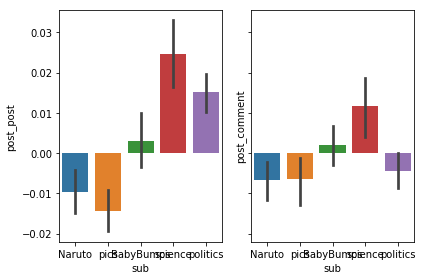

In [28]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

sns.barplot(y='post_post', x='sub', data=pd.DataFrame(rows), ax=axs[0])
sns.barplot(y='post_comment', x='sub', data=pd.DataFrame(rows), ax=axs[1])


In [14]:
np.mean(gap_post_post_science), np.mean(gap_post_comment_science)

(0.014200587713179847, 0.007078955900531764)

In [30]:
df_posts, df_author_counts_train = import_csvs('science', path='data/cleaned/train/2017/', 
                                                   ext='_train_2017.csv', 
                                                   comment_pre_path='data/cleaned/sub_posts/',
                                                   comment_ext='_posts_2017.csv')
    
# rename post fulltext as body
df_posts = df_posts.rename(index=str, columns={'fulltext': 'body'})
#     _, df_author_counts_test = import_csvs(s, path='data/cleaned/test/2017/', ext='_test_2017.csv', comment_pre_path='data/cleaned/sub_posts/')

# build the SLMs using SRILM, this requires jupyter magic to run the bash commands for SRILM
# Note that the paths can get weird here since SRILM + its data exists pretty far away from the notebooks
# The SLMs are just saved in a directory: /homes/gws/taugust/ARK/srilms_LMs
slms = build_total_SLM_SRILM(df_posts, df_author_counts_train, slm_count=10, name='science', use_saved_lms=False, kind='post', num_authors=200, threshold_count=3)


Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/train/2017/author_counts/science_author_counts_train_2017.csv ..... Done
Creating  10 SLMs  for  month None .....
No month...taking all author counts
No month...taking all author counts
Reading text corpus at ../data/srilm_data/science_0_month_total.txt  and writing to count file  ../srilms_LMs/counts/post_science_0_month_total.count .....

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Done
Training LM from count file ../srilms_LMs/counts/post_science_0_month_total.count  to  ../srilms_LMs/post/science/science_0_month_total.lm ....warning: discount coeff 5 is out of range: 1.15718
Done
No month...taking all author counts
No month...taking all author counts
Reading text corpus at ../data/srilm_data/science_1_month_total.txt  and writing to count file  ../srilms_LMs/counts/post_science_1_month_total.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_1_month_total.count  to  ../srilms_LMs/post/science/science_1_month_total.lm ....warning: discount coeff 6 is out of range: 1.50236
Done
No month...taking all author counts
No month...taking all author counts
Reading text corpus at ../data/srilm_data/science_2_month_total.txt  and writing to count file  ../srilms_LMs/counts/post_science_2_month_total.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_2_month_total.count  to  ../srilms_LMs/post/science/science_2_month_tot

In [40]:
# scratch for calculating acc gap
df_posts, df_author_counts_test = import_csvs('science', 
                                                       path='data/cleaned/test/2017/', 
                                                       ext='_test_2017.csv', 
                                                       comment_pre_path='data/cleaned/sub_posts/', 
                                                       comment_ext='_posts_2017.csv')

df_posts = df_posts.rename(index=str, columns={'fulltext': 'body'})

acc_gap_posts_posts = calc_acc_gap_SRILM(slms, df_author_counts_test, df_posts, 'science', kind='post',
                                       num_active_authors=5, num_active_posts=10, num_outside_authors=50, num_outside_posts=1)


Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 5 sampled outside users: 50
No month...taking all author counts
No month...taking all author counts
sampled active comments: 50 sampled outside comments: 50


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


[7.481985053211702, 7.6752485627695295, 7.661301395328479, 7.704486761033374, 7.716954552294561, 7.650791839119508, 7.626094484166679, 7.803700407666976, 7.560805120096889, 7.247744317508274] [8.300439508400476, 8.437831537980102, 8.299514844702907, 8.381894173308366, 8.286839111683726, 8.220911772273114, 8.150107748188196, 8.372243457586356, 8.148192845438908, 8.176055933167069]


In [ ]:
# scratch for calculating acc gap
df_posts, df_author_counts_test = import_csvs('science', 
                                                       path='data/cleaned/test/2017/', 
                                                       ext='_test_2017.csv', 
                                                       comment_pre_path='data/cleaned/sub_posts/', 
                                                       comment_ext='_posts_2017.csv')

df_posts = df_posts.rename(index=str, columns={'fulltext': 'body'})

acc_gap_posts_posts = calc_acc_gap_SRILM(slms, df_author_counts_test, df_posts, 'science', kind='post',
                                       num_active_authors=5, num_active_posts=10, num_outside_authors=50, num_outside_posts=1)


In [41]:
df_comments, _ = import_csvs('science', path='data/cleaned/test/2017/', ext='_test_2017.csv', comment_pre_path='data/cleaned/sub_comments/', comment_ext='_comments_2017.csv')

Importing  data/cleaned/sub_comments/science_comments_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/science_author_counts_test_2017.csv ..... Done


In [43]:
acc_gaps_post_comment = calc_acc_gap_SRILM(slms, df_author_counts_test, df_comments, 'science', kind='comment',
                                       num_active_authors=5, num_active_posts=10, num_outside_authors=50, num_outside_posts=1)

Calculating cross entropy for Total .....
No month...taking all author counts
No month...taking all author counts
sampled active users: 5 sampled outside users: 50
No month...taking all author counts
No month...taking all author counts
sampled active comments: 50 sampled outside comments: 50


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


[8.879824291258204, 8.696529436653101, 8.847286655286773, 8.735728967719075, 8.586664552720643, 8.805185062152518, 8.817885745295253, 8.642619270028836, 8.700217747982812, 8.751876409708554] [9.006196181028454, 8.618842099877469, 8.710055279262795, 8.76773953554558, 8.636910593803583, 8.824133289227861, 8.81050704939725, 8.70753997533961, 8.702928646521544, 8.773868448995449]


In [44]:
gaps_post_post = [acc_gaps_post_post[m]['gap'] for m in range(1,13)]

gaps_post_comments = [acc_gaps_post_comment[m]['gap'] for m in range(1,13)]
  

NameError: name 'acc_gaps_post_post' is not defined